In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

/home/jiao/anaconda3/envs/py38_cs285/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
a = [np.ones((2,4)), np.zeros((2,4)), np.ones((2,4))]
b = np.concatenate(a)
print(a)
print(b)

In [76]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0]) 
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])  
        self.fc3 = nn.Linear(hidden_size[1], output_size)  
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
    def loss(self, output, target):
        loss = F.mse_loss(output, target)
        return loss


In [77]:
def initialize_weights(self):
	for m in self.modules():
		# 判断是否属于Conv2d
		if isinstance(m, nn.Conv2d):
			torch.nn.init.xavier_normal_(m.weight.data)
			# 判断是否有偏置
			if m.bias is not None:
				torch.nn.init.constant_(m.bias.data,0.3)
		elif isinstance(m, nn.Linear):
			torch.nn.init.normal_(m.weight.data, 0.1)
			if m.bias is not None:
				torch.nn.init.zeros_(m.bias.data)
		elif isinstance(m, nn.BatchNorm2d):
			m.weight.data.fill_(1) 		 
			m.bias.data.zeros_()	

loss: tensor(6.6809, grad_fn=<MseLossBackward0>)
loss: tensor(0.4094, grad_fn=<MseLossBackward0>)
loss: tensor(0.3755, grad_fn=<MseLossBackward0>)
loss: tensor(0.3610, grad_fn=<MseLossBackward0>)
loss: tensor(0.3505, grad_fn=<MseLossBackward0>)
loss: tensor(0.3378, grad_fn=<MseLossBackward0>)
loss: tensor(0.3221, grad_fn=<MseLossBackward0>)
loss: tensor(0.3056, grad_fn=<MseLossBackward0>)
loss: tensor(0.2903, grad_fn=<MseLossBackward0>)
loss: tensor(0.2768, grad_fn=<MseLossBackward0>)
loss: tensor(0.2642, grad_fn=<MseLossBackward0>)
loss: tensor(0.2517, grad_fn=<MseLossBackward0>)
loss: tensor(0.2224, grad_fn=<MseLossBackward0>)
loss: tensor(0.2121, grad_fn=<MseLossBackward0>)
loss: tensor(0.1917, grad_fn=<MseLossBackward0>)
loss: tensor(0.1727, grad_fn=<MseLossBackward0>)
loss: tensor(0.1613, grad_fn=<MseLossBackward0>)
loss: tensor(0.1545, grad_fn=<MseLossBackward0>)
loss: tensor(0.1503, grad_fn=<MseLossBackward0>)
loss: tensor(0.1475, grad_fn=<MseLossBackward0>)
loss: tensor(0.1450,

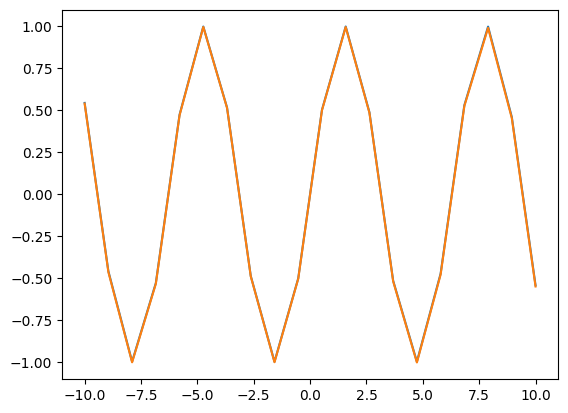

In [88]:
net = Net(1, [10,10], 1)
# print(list(net.parameters()))
# print("-------初始化-------")

initialize_weights(net)
# print(list(net.parameters()))

t = np.linspace(-10,10,20)
y = np.sin(t)
data = [t,y]

for i in range(10000):
    y_hat = net(torch.tensor(t).reshape(-1,1).float())
    loss = net.loss(y_hat, torch.tensor(y).reshape(-1,1).float())
    net.optimizer.zero_grad()
    loss.backward()
    net.optimizer.step()
    if i%100 == 0:
        print("loss:",loss)

t = np.linspace(-10,10,20)
y = np.sin(t)
y_hat = net(torch.tensor(t).reshape(-1,1).float())
plt.figure(1)
plt.plot(t,y)
plt.plot(t,y_hat.detach().numpy())
plt.show()


# t = np.linspace(-20,20,2000)
# y = np.sin(t)
# y_hat = net(torch.tensor(t).reshape(-1,1).float())
# plt.figure(2)
# plt.plot(t,y)
# plt.plot(t,y_hat.detach().numpy())
# plt.show()



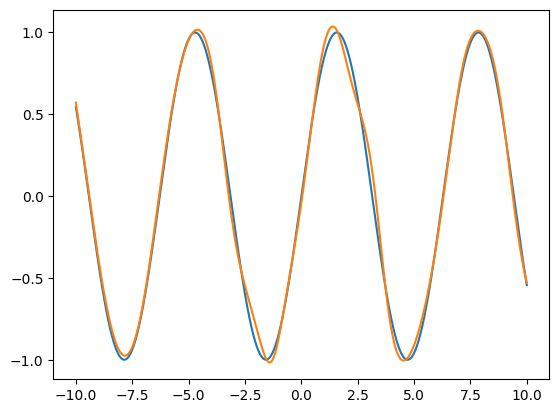

In [87]:
t = np.linspace(-10,10,10000)
y = np.sin(t)
y_hat = net(torch.tensor(t).reshape(-1,1).float())
plt.figure(1)
plt.plot(t,y)
plt.plot(t,y_hat.detach().numpy())
plt.show()